In [1]:
## import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#set plotting style
sns.set_style('whitegrid')

In [2]:
edgap = pd.read_excel(
    'https://raw.githubusercontent.com/brian-fischer/DATA-5100/main/EdGap_data.xlsx'
    ,dtype={'NCESSCH School ID': object})

C:\Users\brisa\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
school_info = pd.read_csv(r'C:\Users\brisa\Documents\0 Seattle U\DATA 5100 Foundations\education\data\ccd_sch_029_1617_w_1a_11212017.csv'
                         ,encoding='unicode_escape')

C:\Users\brisa\AppData\Local\Temp\ipykernel_4024\1003416712.py:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_info = pd.read_csv(r'C:\Users\brisa\Documents\0 Seattle U\DATA 5100 Foundations\education\data\ccd_sch_029_1617_w_1a_11212017.csv'


In [4]:
# LOAD YOUR DATA HERE TOO

In [5]:
## pd.set_option('display.max_columns',None)
edgap.head()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [6]:
school_info.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported


In [7]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


Some null values, data types look correct

In [8]:
school_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

More than 100k rows, location/identifying info is mostly non-null

School ID (NCESSCH) is a float here, but an object in the other dataset
* EdGap dataset does not contain all the schools 
* There are missing values in each
* each dataset is in a tidy/long format
* data types for the variables of interest look correct but mismatch types for the keys

## visualize the data before diving into deep preprocessing
the goal of this analysis is to run a regression analysis ot determine relationship between ACT score and various predictors of socioeconomic factors

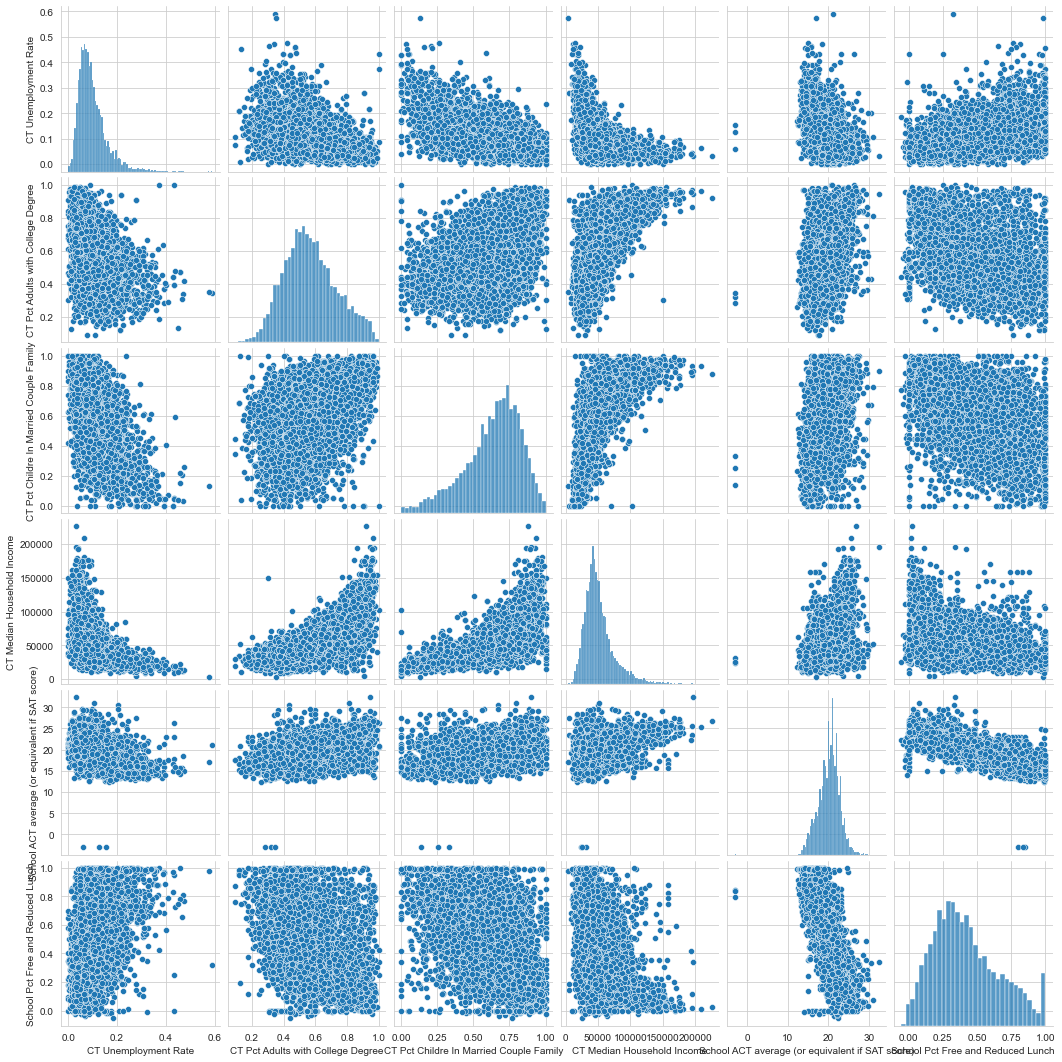

In [9]:
## begin with a pairplot
sns.pairplot(
    edgap.drop(columns='NCESSCH School ID')
    # drop this because it's just the ID, focus on the actual data
);
plt.show()

Is there a relationship between the socioeconomic variables and the ACT scores? some releationships emerge

This is also a good opportunity for quality control: note that there are negative values in the ACT scores (does not pass sanity check)

We can specify that we want regression lines draw on and specify features of them/plots themselves by adding in kind='reg' 

<function matplotlib.pyplot.show(close=None, block=None)>

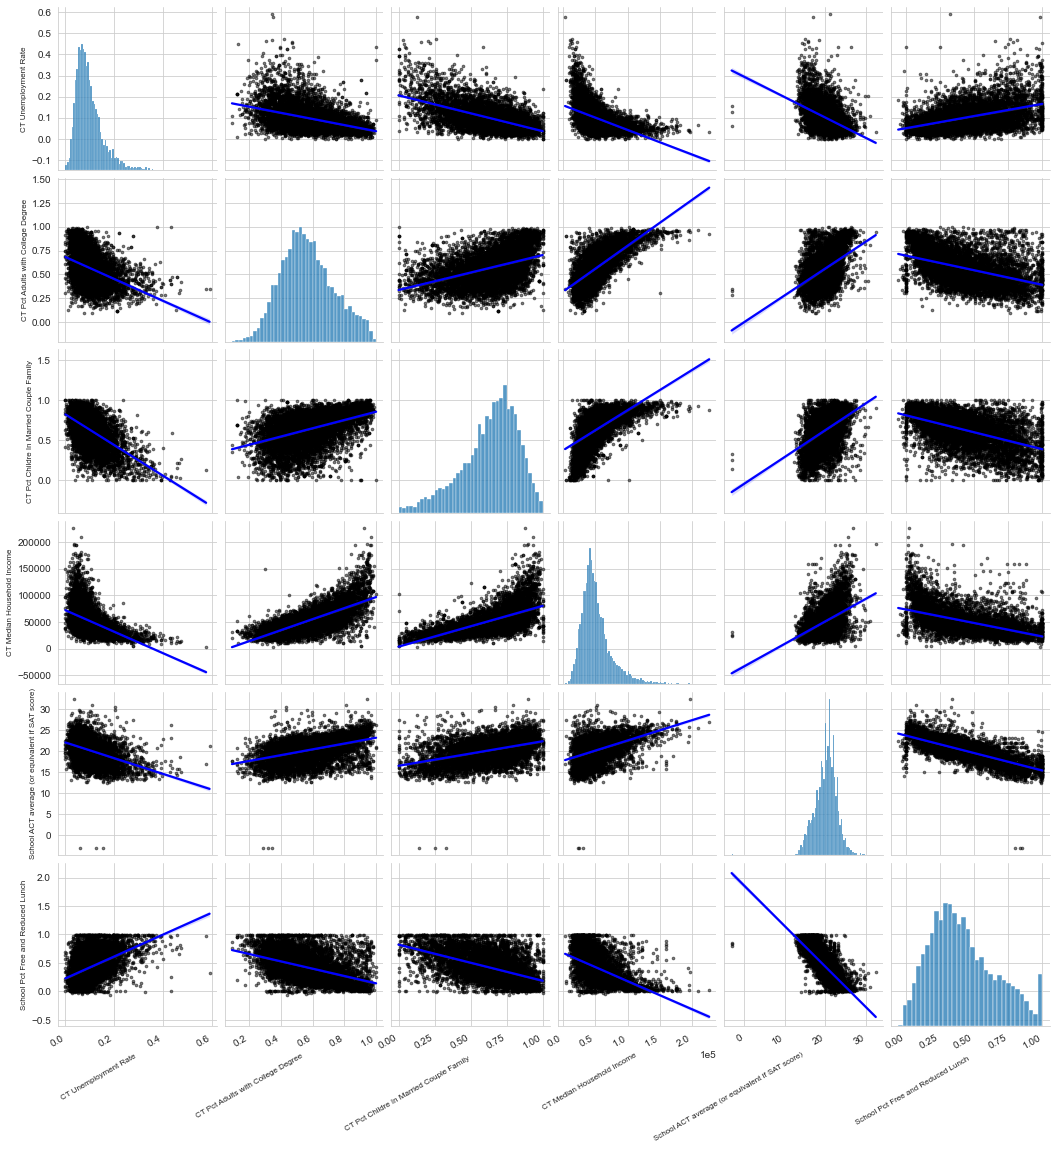

In [10]:
fig = sns.pairplot(
    edgap.drop(columns='NCESSCH School ID')
    ,kind='reg' ## regression 
    ,plot_kws={
        "line_kws":{'color':'blue'},
        "scatter_kws":{"alpha":0.5,"color":"k","s":7},
        },
)

for ax in fig.axes.flat:
    if ax.get_xlabel()=='CT Median Household Income':
        ax.ticklabel_format(style='sci',axis='x',scilimits=(0,0)) ## apply sci notation
    ax.set_xlabel(ax.get_xlabel(),fontsize=8, rotation=30, ha='right') ## x axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(),fontsize=8) ## y axis label size
    
    ## rotate x axis tick labels
    plt.setp(ax.get_xticklabels(),rotation=30,ha='right')
plt.show
    
    

With a plot this large it is worth looking at individual relationships 

<function matplotlib.pyplot.show(close=None, block=None)>

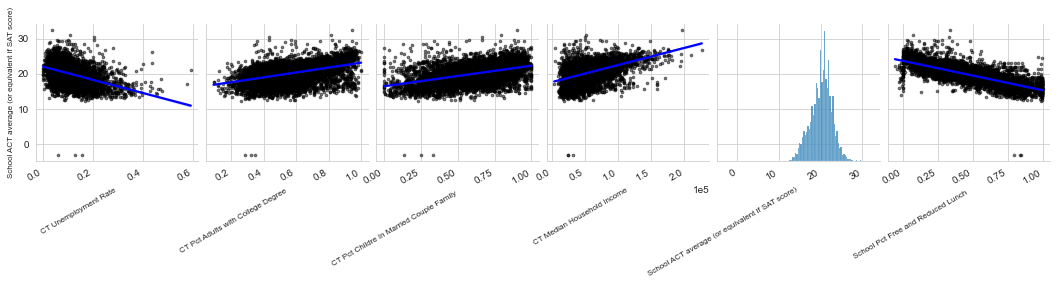

In [11]:
fig = sns.pairplot(
    edgap.drop(columns='NCESSCH School ID')
    ## now we'll see a single row
    ,y_vars=['School ACT average (or equivalent if SAT score)']
    ,kind='reg' ## regression 
    ,plot_kws={
        "line_kws":{'color':'blue'},
        "scatter_kws":{"alpha":0.5,"color":"k","s":7},
        },
)

for ax in fig.axes.flat:
    if ax.get_xlabel()=='CT Median Household Income':
        ax.ticklabel_format(style='sci',axis='x',scilimits=(0,0)) ## apply sci notation
    ax.set_xlabel(ax.get_xlabel(),fontsize=8, rotation=30, ha='right') ## x axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(),fontsize=8) ## y axis label size
    
    ## rotate x axis tick labels
    plt.setp(ax.get_xticklabels(),rotation=30,ha='right')
plt.show
    
    

* there does appear to be a relationship between the socioeconomic variables and act scores
* there are some out of range ACT scores and percent lunch values that we need to address
* we shoul dhave confidence that it is worthwhile to spend time prepping this data

# Data Preparation

## Select relevant subsets of the data
the school info has many columns, we only need year, school identity, location, and type

keep SCHOOL_YEAR, NCESSCH, LSTATE, LZIP, SCH_TYPE_TEXT, LEVEL, CHARTER_TEXT

In [12]:
school_info = school_info[['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']
                         ]

school_info.head()

,SCHOOL_YEAR,NCESSCH,LSTATE,LZIP,SCH_TYPE_TEXT,LEVEL,CHARTER_TEXT
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


In [13]:
edgap = edgap.rename(
    columns={
        "NCESSCH School ID":'id'
        ,"CT Pct Adults with College Degree" : "percent_college"
        ,"CT Unemployment Rate" : 'rate_unemployment'
        ,"CT Pct Childre In Married Couple Family" : 'percent_married'
        ,"CT Median Household Income" : "median_income"
        ,"School ACT average (or equivalent if SAT score)" : "average_act"
        ,"School Pct Free and Reduced Lunch" : "percent_lunch"
    })

In [47]:
edgap.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [14]:
school_info = school_info.rename(
    columns={
        "SCHOOL_YEAR" : 'year'
        ,"NCESSCH" : 'id'
        ,"LSTATE" : 'state'
        ,"LZIP" : 'zip_code'
        ,"SCH_TYPE_TEXT" : 'school_type'
        ,"LEVEL" : 'school_level'
        ,"CHARTER_TEXT" : "charter"
    })

In [15]:
school_info.head()

,year,id,state,zip_code,school_type,school_level,charter
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


# Now that we've processed each dataframe we will join them
## We need to make sure the keys match first

In [16]:
school_info['id'] = school_info['id'].astype('object')
school_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   zip_code      102183 non-null  object
 4   school_type   102181 non-null  object
 5   school_level  102179 non-null  object
 6   charter       102179 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


Now we want to keep all the EdGap data, and bring in the school data where we have the data we care about, this will be a left join on the EdGap dataset

In [17]:
df = edgap.merge(
    school_info
    ,how='left'
    ,on='id')
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7986 entries, 0 to 7985
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  charter            7898 non-null   object 
dtypes: float64(6), object(7)
memory usage: 873.5+ KB


# Quality Control
### Check the min and max values in each column, we know there are some natural bounds like percentages between 0-100, or ensuring positive values where negative is not possible

In [19]:
df.describe()

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
count,7972.000000,7973.000000,7961.000000,7966.000000,7986.000000,7986.000000
mean,0.098730,0.568930,0.633440,52026.905222,20.181532,0.420651
std,0.058959,0.165704,0.196764,24228.057079,2.595201,0.239754
min,0.000000,0.091493,0.000000,3589.000000,-3.070818,-0.054545
25%,0.058655,0.450828,0.523810,36597.250000,18.600000,0.238501
50%,0.085649,0.554979,0.667594,46833.500000,20.400000,0.381570
75%,0.123376,0.676571,0.777135,61369.250000,21.910867,0.575447
max,0.590278,1.000000,1.000000,226181.000000,32.362637,0.998729


In [20]:
df.select_dtypes(include=['number']).agg(['min','max']).round(2)
## selecting only the numerical data

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
min,0.00,0.09,0.0,3589.0,-3.07,-0.05
max,0.59,1.00,1.0,226181.0,32.36,1.00


There are some extreme values that are unlikely, and some that are impossible. The clearly incorrect values we'll set to NaN

In [21]:
df.loc[df['percent_lunch']<0,'percent_lunch']= np.nan
df.loc[df['average_act']<1,'average_act'] = np.nan

## Checking categorical data

In [22]:
df['school_type'].value_counts()

Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: school_type, dtype: int64

In [23]:
df['school_level'].value_counts()

High            7230
Other            631
Not reported      35
Elementary         2
Name: school_level, dtype: int64

In [24]:
df['charter'].value_counts()

No                7329
Yes                352
Not applicable     217
Name: charter, dtype: int64

In [25]:
## keep only the high schools
df = df.loc[df['school_level']=='High']

In [26]:
## check for duplicated rows
df.duplicated().sum()

0

# Missing Values
start with determining how many are missing

In [27]:
df.isna().sum().to_frame(name='Number of Missing values')

,Number of Missing values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,3
percent_lunch,20
year,0
state,0
zip_code,0


In [28]:
percent_missing = df.isna().mean().round(4) * 100
percent_missing.to_frame(name='Percent Missing Values')

,Percent Missing Values
id,0.00
rate_unemployment,0.17
percent_college,0.15
percent_married,0.28
median_income,0.22
average_act,0.04
percent_lunch,0.28
year,0.00
state,0.00
zip_code,0.00


In [29]:
df['state'].value_counts()

TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: state, dtype: int64

In [30]:
df['state'].nunique()

20

Show on a map where we have values and what they are

In [31]:
#pip install plotly

In [34]:
import plotly.offline as po
import plotly.graph_objs as pg
po.init_notebook_mode(connected=True)

In [36]:
layout = dict(
    geo={"scope": "usa"},
    coloraxis_colorbar=dict(title="Number of Schools")
)

data = dict(
    type="choropleth",
    locations=df["state"].value_counts().index,
    locationmode="USA-states",
    z=df["state"].value_counts().values,
    coloraxis="coloraxis"
)

x = pg.Figure(data=[data], layout=layout)
po.iplot(x)

We are missing a lot of data simply from omission. We're going to drop the rows where the average ACT score is missing, since that is what we are interested in and we don't have many missing values

In [37]:
df=df.dropna(subset=['average_act'])

In [38]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,0
percent_lunch,20
year,0
state,0
zip_code,0


If we were to drop rows that have NaNs for any socioeconomic variables, then we would negatively affect our analysis using the variables where the data was present. We will impute those rows based on relationships we see in the data

# Data Imputation

In [39]:
predictor_variables = [
    'rate_unemployment'
    ,'percent_college'
    ,'percent_married'
    ,'median_income'
    ,'percent_lunch'
    ,'state'
    ,'charter'
]

We will use an interative imputer, what we're doing is using a type of regression analysis to look at relationships between predictors so if we're missing one i can use the best guess of it based on it's relationship to the other variables

In [40]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [41]:
imputer = IterativeImputer()

In [42]:
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

In [43]:
print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


Fit the imputer with the data from those columns, here we are learning the relationships between thoes columns and then we can apply the transform method to actually replace the values

In [44]:
imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

In [45]:
df.loc[:,numerical_predictors] = imputer.transform(df.loc[:,numerical_predictors])

In [46]:
df.isna().sum()

id                   0
rate_unemployment    0
percent_college      0
percent_married      0
median_income        0
average_act          0
percent_lunch        0
year                 0
state                0
zip_code             0
school_type          0
school_level         0
charter              0
dtype: int64

This confirms we have imputed all our missing values!

In [49]:
df['year'].max()

'2016-2017'